In [1]:
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from xenso import indices

xr.set_options(display_expand_data=False)

In [2]:
DATA_PATH = "../data/"

In [3]:
GODAS_SST_DS = xr.open_dataset(
    os.path.join(DATA_PATH, "processed", "godas.sst.anom.nc")
)
GODAS_SST_ANOM = GODAS_SST_DS.ssta.where(GODAS_SST_DS.mask == 1)
GODAS_SST_ANOM

<xarray.DataArray 'ssta' (time: 523, lat: 24, lon: 72)>
0.8282 0.7254 0.6644 0.578 0.4043 0.2976 ... 0.2628 0.5006 0.6795 0.7009 0.4378
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-07-01
  * lat      (lat) float64 -57.5 -52.5 -47.5 -42.5 -37.5 ... 42.5 47.5 52.5 57.5
  * lon      (lon) float64 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
Attributes:
    period:     Climatology GODAS 1991-2020
    units:      degC
    long_name:  GODAS SST Anomaly

In [4]:
ecgodas = indices.ECindex(GODAS_SST_ANOM, isanomaly=True, base_period=("1991", "2020"))
ecindex = ecgodas.ecindex
ecindex.attrs["period"] = "1991-2020"
ecindex

<xarray.Dataset>
Dimensions:  (time: 523)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-07-01
Data variables:
    E_index  (time) float64 0.3076 0.02221 0.01172 -0.1976 ... 1.486 1.605 2.179
    C_index  (time) float64 0.5617 0.6557 0.261 0.3773 ... -0.1409 0.231 0.1009
Attributes:
    period:   1991-2020

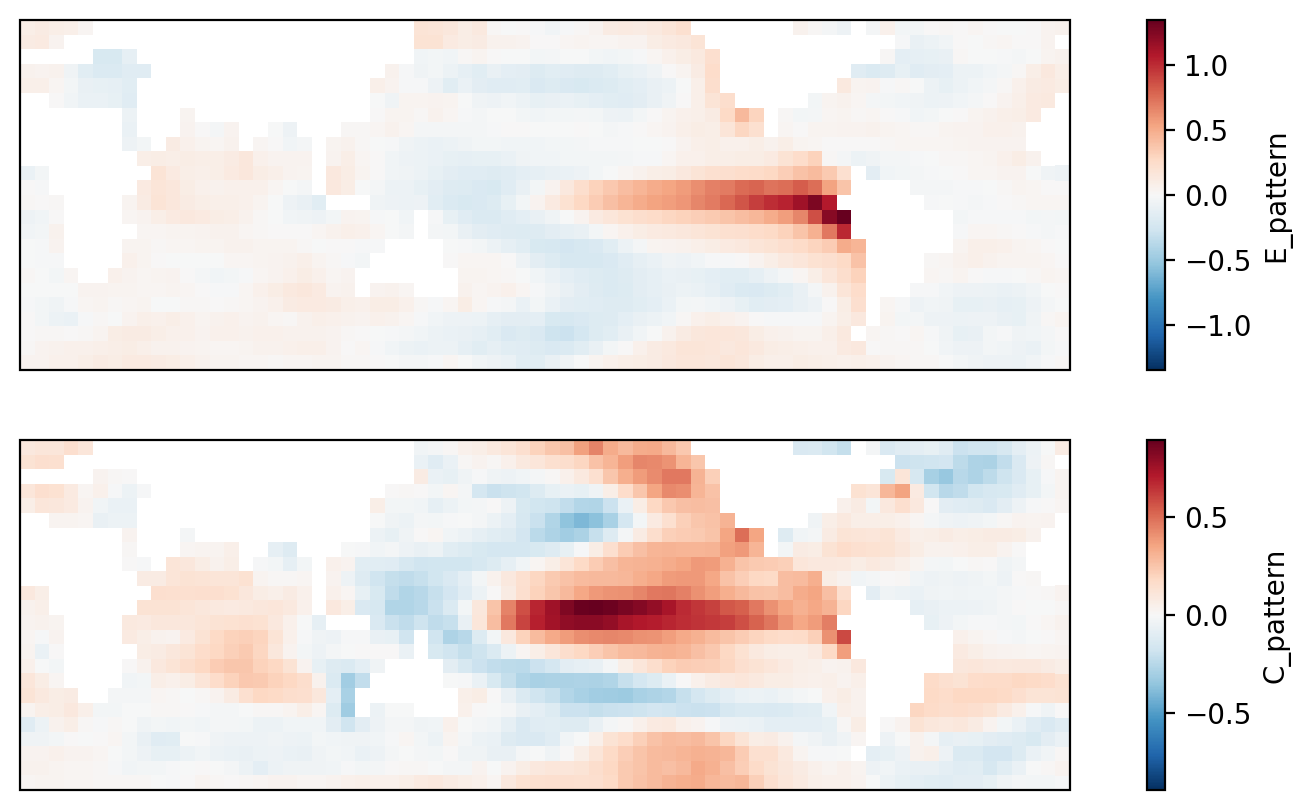

In [5]:
patterns = ecgodas.patterns


fig, ax = plt.subplots(
    nrows=2,
    figsize=(10, 5),
    dpi=200,
    subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)},
)
patterns.E_pattern.plot(ax=ax[0], transform=ccrs.PlateCarree())
patterns.C_pattern.plot(ax=ax[1], transform=ccrs.PlateCarree())

In [6]:
ecindex.to_netcdf(os.path.join(DATA_PATH, "processed", "godas.ecindex.nc"))

In [7]:
ecindex_3mn = ecgodas.ecindex_smooth
# ecindex_3mn = ecindex_3mn.rename({var: f"{var}_3mn" for var in ecindex_3mn.data_vars})
ecindex_3mn.attrs["period"] = "1991-2020"
ecindex_3mn

<xarray.Dataset>
Dimensions:  (time: 523)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-07-01
Data variables:
    E_index  (time) float64 0.2362 0.09093 -0.03799 ... 1.511 1.719 2.036
    C_index  (time) float64 0.5852 0.5335 0.3888 ... -0.1484 0.1055 0.1334
Attributes:
    period:   1991-2020

In [8]:
ecindex_3mn.to_netcdf(os.path.join(DATA_PATH, "processed", "godas.ecindex_3mn.nc"))

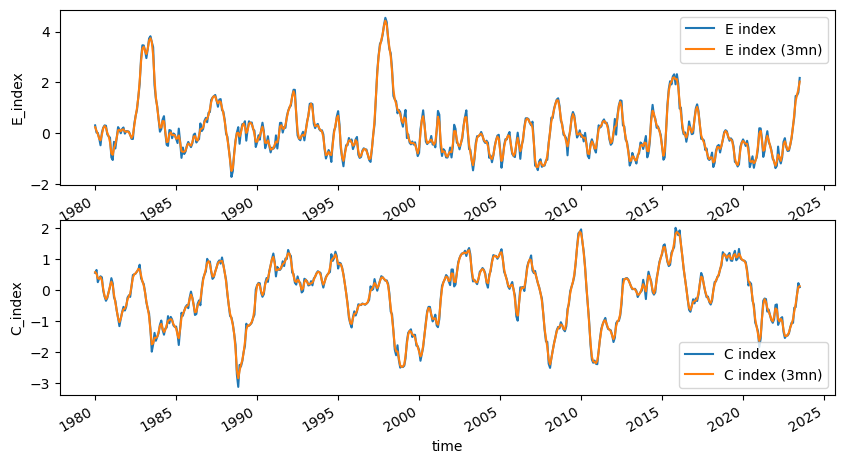

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
ecindex.E_index.plot(ax=ax[0], label="E index")
ecindex_3mn.E_index.plot(ax=ax[0], label="E index (3mn)")
ecindex.C_index.plot(ax=ax[1], label="C index")
ecindex_3mn.C_index.plot(ax=ax[1], label="C index (3mn)")
ax[0].legend()
ax[1].legend()

In [10]:
en34 = GODAS_SST_ANOM.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(
    dim=["lat", "lon"]
)
en34.name = "en34"
en34

<xarray.DataArray 'en34' (time: 523)>
0.6068 0.5336 0.1028 0.1234 0.2763 ... -0.1109 0.08506 0.4233 0.8063 0.963
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-07-01

In [11]:
en34.to_netcdf(os.path.join(DATA_PATH, "processed", "godas.en34.nc"))

In [12]:
en34_3mn = en34.rolling(time=3, center=True, min_periods=2).mean()
en34_3mn.name = "en34"
en34_3mn

<xarray.DataArray 'en34' (time: 523)>
0.5702 0.4144 0.2533 0.1675 0.2785 ... -0.1925 0.1325 0.4382 0.7308 0.8846
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-07-01

In [13]:
en34_3mn.to_netcdf(os.path.join(DATA_PATH, "processed", "godas.en34_3mn.nc"))

(3652.0, 19539.0)

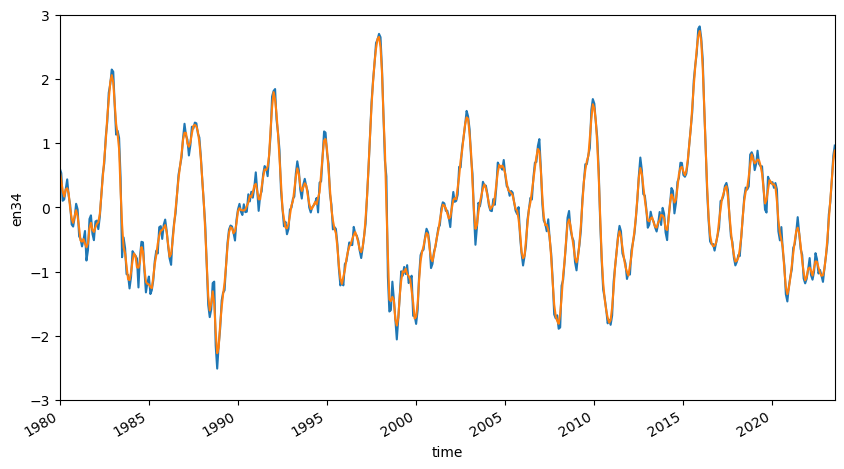

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
en34.plot(ax=ax)
en34_3mn.plot(ax=ax)
ax.set_ylim(-3, 3)
ax.set_xlim(en34.time.min(), en34.time.max())